In [153]:
import numpy as np
import copy
from PIL import Image
import open3d as o3d
import matplotlib.pyplot as plt
from magpie.perception import pcd
from open3d.web_visualizer import draw

In [164]:
import importlib
importlib.reload(pcd)

<module 'magpie.perception.pcd' from '/home/will/MAGPIE/magpie/perception/pcd.py'>

In [155]:
from magpie import realsense_wrapper as real
rsc = real.RealSense()
rsc.initConnection()

In [156]:
from magpie.perception.label_owlvit import LabelOWLViT
path = "google/owlvit-base-patch32"
label_vit = LabelOWLViT(path)

In [160]:
from magpie.perception.mask_sam import MaskSAM
ckpt = "/home/will/workspace/owlvit_segment_anything/sam_vit_h_4b8939.pth"
mask_sam = MaskSAM(ckpt)

[761.461067199707, -0.5411088466644287, 996.213493347168, 213.5896360874176]
[870.218677520752, 128.2274490594864, 1047.3310661315918, 288.831462264061]
[995.1159954071045, 193.1472873687744, 1244.9601459503174, 384.51277256011963]
[75.1773738861084, 126.45349502563477, 359.9523639678955, 428.12089920043945]
[425.50435066223145, 313.08586835861206, 708.7550640106201, 548.7206768989563]
[887.6302528381348, 434.31063294410706, 1067.869472503662, 567.4267995357513]
[651.717848777771, 522.5703245401382, 810.4151773452759, 666.0587972402573]
[359.58422660827637, 545.4021996259689, 608.5477924346924, 719.7256690263748]


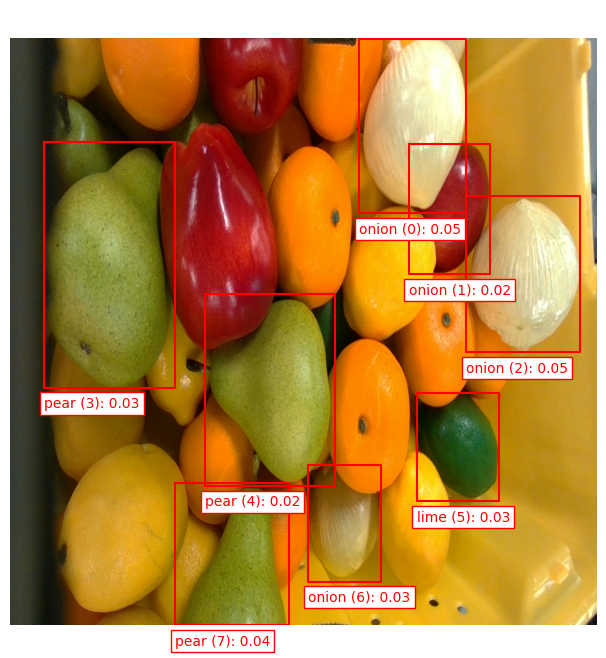

In [157]:
p, rgbd_image = rsc.getPCD()
image = np.array(rgbd_image.color)
queries = ["a photo of an apple", "a photo of a lemon", "a photo of a lime", "a photo of a pear", "a photo of a onion"]
abbrevq = ["apple", "lemon", "lime", "pear", "onion"]
label_vit.set_threshold(0.02)
bboxes, uboxes = label_vit.label(image, queries, abbrevq, plot=True)


In [159]:
index = 6
# this does the [x, y, z] --> [y, -x, z] grasp pose switch, and the -y inversio on the y-axis orientation
rgbd_image, cpcd, tmat = pcd.display_segment(label_vit.boxes, index, rgbd_image, rsc, type="box")

modified indices: [0 1 2]
tmat: [[ 0.27683769  0.71707979 -0.63965418  0.0435895 ]
 [-0.94647264  0.31846768 -0.05261055  0.10174523]
 [ 0.16598322  0.61997977  0.76686026  0.2793356 ]
 [ 0.          0.          0.          1.        ]]
scaled tmat: [[ 0.28308182  0.2694468  -0.07805819  0.0435895 ]
 [-0.96782055  0.11966604 -0.00642016  0.10174523]
 [ 0.16972701  0.23296091  0.09358138  0.2793356 ]
 [ 0.          0.          0.          1.        ]]
TriangleMesh with 1134 points and 2240 triangles.
[Open3D INFO] Window window_20 created.


WebVisualizer(window_uid='window_20')

[Open3D INFO] Sending init frames to window_20.


[70876:547][8589] (stun_port.cc:96): Binding request timed out from 192.168.0.x:50261 (enp3s0)
[70888:389][8589] (stun_port.cc:96): Binding request timed out from 192.168.0.x:38926 (enp3s0)


In [134]:
tmat

array([[ 0.81600229, -0.5354047 , -0.21790379, -0.01943802],
       [-0.52344845, -0.84434179,  0.11440567,  0.12545837],
       [ 0.24523861, -0.02070611,  0.9692416 ,  0.20089371],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [162]:
# Segmentation Masks
mask_sam.set_image_and_labels(np.array(rgbd_image.color), np.array([np.array(i[0]) for i in label_vit.boxes]), label_vit.labels)


(-0.5, 1279.5, 719.5, -0.5)

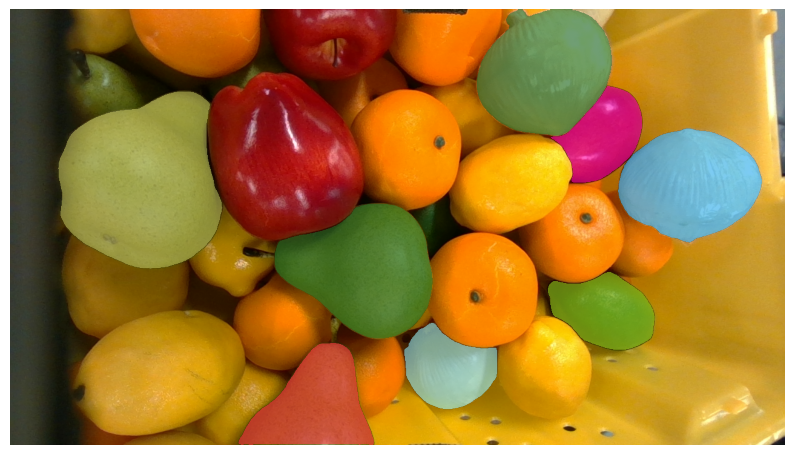

In [163]:
masks = mask_sam.get_masks(label_vit.labels)
plt.figure(figsize=(10, 10))
plt.imshow(image)
for mask in masks:
    mask_sam.show_mask(mask.cpu().numpy(), plt.gca(), random_color=True)
plt.axis('off')

In [167]:
index = 4
rgbd_image, mcpcd, tmat = pcd.display_segment(masks, index, rgbd_image, rsc, type="mask")

modified indices: [2 0 1]
tmat: [[ 0.28566703  0.92061021 -0.26621645 -0.01614089]
 [-0.95387313  0.24639065 -0.1715159   0.02465896]
 [-0.09230604  0.30293315  0.94853102  0.20862523]
 [ 0.          0.          0.          1.        ]]
scaled tmat: [[ 0.07769684  0.51851156 -0.00660802 -0.01614089]
 [-0.25943816  0.13877361 -0.00425737  0.02465896]
 [-0.02510576  0.17061981  0.02354444  0.20862523]
 [ 0.          0.          0.          1.        ]]
TriangleMesh with 1134 points and 2240 triangles.
[Open3D INFO] Window window_22 created.


WebVisualizer(window_uid='window_22')

[Open3D INFO] Sending init frames to window_22.


[71626:823][8589] (stun_port.cc:96): Binding request timed out from 192.168.0.x:43866 (enp3s0)
[71638:339][8589] (stun_port.cc:96): Binding request timed out from 192.168.0.x:45023 (enp3s0)


In [168]:
tmat

array([[ 0.28566703,  0.92061021, -0.26621645,  0.02465896],
       [-0.95387313,  0.24639065, -0.1715159 ,  0.01614089],
       [-0.09230604,  0.30293315,  0.94853102,  0.20862523],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])